# **THE STOLEN SZECHUAN SAUCE CASE SOLVED**

# **IMPORTS**

In [6]:
# Definition of variables & run imports
%run imports.ipynb

home_path=!pwd
thisnb=home_path[0]+"/SOLVED_TheStolenSzechuanSauceCase.ipynb"

# **FORENSIC EVIDENCE**

This section lists the evidence we will use in this case. 

**Evidence**, in cyber forensics, is information of probative value that is stored or transmitted in binary form. This means that once an incident is identified, this type of information is extracted to establish what has happened.

The evidence we will use for this case corresponds with the devices DC01 (Domain Controller) and Desktop: 
 - DC01 Disk Image (EO1)

 - DC01 Autoruns

 - Case001 PCAP

 - Desktop Disk Image (E01)

 - Desktop Autoruns

You can find more information at: https://dfirmadness.com/the-stolen-szechuan-sauce/

# **FORENSIC PROCESSING**

As previously mentioned, the **evidence** is acquired in binary form. Therefore, it is necessary to process and parse it, so that it can be understood and visualized by the forensic analyst.

There are different ways to process it, depending on the type of information one tool or another will be used.



**Plaso**
-

Plaso (Plaso Langar Að Safna Öllu), or super timeline of all the things, is a Python-based engine used by several tools for automatic creation of timelines. Plaso's default behavior is to create super timelines but it also supports creating more targeted timelines.

You can read more about it here: https://plaso.readthedocs.io/en/latest/

But, what is a **forensic artifact**? An artifact in this context is an operating system object which provides information about the activity or configuration of the computer or the users. Examples can be: Windows registry, Prefetch files, Memory objects...

Creating a Timeline with Plaso
-

 - **Using log2timeline and psort**:

    You can use “log2timeline” and “psort”. For example:

In [7]:
# Do not run this cell. It is intended to be run on the console. You already downloaded the processed evidence.

# log2timeline.py --storage-file timeline.plaso image.raw
# psort.py -o dynamic -w registrar.csv timeline.plaso

**Mactime**
-

Creates an ASCII timeline of file activity based on the output of the fls tool. It can be used to detect anomalous behavior and reconstruct events. The fls command must use the -m flag to generate an output with timestamps.

Mactime reads the body file (using the '-b' argument), which contains a line for each file or event. Mactime then sorts the data based on its temporal data and prints the result. It can optionally use a starting date or a date range to limit the data being printed. 

You can read more about it here: https://wiki.sleuthkit.org/index.php?title=Mactime

Creating a Timeline with Mactime
-

In [128]:
# Do not run the cell. It is intended to be run on the console
# mactime -b body.txt 2002-03-01 > tl.03.01.2002.txt

Some of the arguments for mactime help to make the output more readable. On a Unix system, the User and Group IDs can be mapped to actual names by using the '-p' and '-q' flags. The '-z' flag can be used to specify the time zone, if it is different from the local timezone. 

In [129]:
# Do not run the cell. It is intended to be run on the console
# mactime -b body.txt -z EST5EDT 2002-03-01 > tl.03.01.2002.txt

If you are going to include the resulting timeline in a document, then maybe it is better to supply the '-d' argument to output in comma delimited format. The resulting timeline can then be imported into a spread sheet and included as a table.

The '-i' option in 'mactime' creates an index summary file, including how many hits were found per day or hour. Using '-d' with '-i' allows one to easily import data into a spread sheet that can be graphed to spot suspicious behavior.

In [130]:
# Do not run the cell. It is intended to be run on the console
# mactime -b body.txt -d -i hour data/tl-hour-sum.txt > timeline.txt

**Autoruns**
-

Autoruns is used to explore or detect persistent mechanisms. It reports Explorer shell extensions, toolbars, browser helper objects, Winlogon notifications, auto-start services, and much more. Autoruns goes way beyond other autostart utilities.

- Displays programs that are configured to run during bootup or login
- Lists the programs and drivers that will start from startup folders and registry keys



<img src="./Pictures/autoruns.jpg">


**Tshark**
-

TShark is a network protocol analyzer. It lets you capture packet data from a live network, or read packets from a previously saved capture file, either printing a decoded form of those packets to the standard output or writing the packets to a file.

You can read more about it here: https://www.wireshark.org/docs/man-pages/tshark.html

Creating a Timeline with Tshark
-

Network packets are in timeline sequence from the earliest to the latest packets.

The -n option disables network object name resolution (such as hostname, TCP and UDP port names). The -r option reads the specified PCAP file.
The -Y option will filter based on Wireshark filters. The -T option displays the type of data (ek,fields,json and pdml) with -E/-e that controls the fields that you want.

In [131]:
# Do not run the cell.
# tshark -n -r body.pcap -Y "http.request.method == "GET"" -T fields -Eheader=y -e ip.src -e ip.dst -e tcp.srcport -e tcp.dstport -e http.request.uri -e frame.time'

# **FORENSIC DATA READING**

## **READING FILES WITH PANDAS:**

After parsing the Disk Image evidence with plaso, we have obtained a JSON that we need to load into the notebook to be able to analyze it in detail.

JSON files can be read with pandas. All you need to do is use the **pd.read_json()** function, that will convert your JSON into a pandas object. You can find more information at https://pandas.pydata.org/pandas-docs/version/1.1.3/reference/api/pandas.read_json.html


In [11]:
plaso_JSON = pd.read_json(home_path[0]+'/Data/DC_plaso.json')

Let's see how the JSON file looks like:

 - With the type() function we can see the object type that we obtained

In [4]:
type(plaso_JSON)

pandas.core.frame.DataFrame

 - Next, let’s see what its columns are and how many it has

In [5]:
plaso_JSON.columns

Index(['event_0', 'event_1', 'event_2', 'event_3', 'event_4', 'event_5',
       'event_6', 'event_7', 'event_8', 'event_9',
       ...
       'event_5340', 'event_5341', 'event_5342', 'event_5343', 'event_5344',
       'event_5345', 'event_5346', 'event_5347', 'event_5348', 'event_5349'],
      dtype='object', length=5350)

 - Each column corresponds to a different event. Let’s select one of them and see what information it contains.

In [6]:
plaso_JSON['event_0']

__container_type__                                                                            event
__type__                                                                         AttributeContainer
build_number                                                                                   9600
data_type                                                             windows:registry:installation
date_time             {'__class_name__': 'PosixTime', '__type__': 'DateTimeValues', 'timestamp': 0}
                                                          ...                                      
account_rid                                                                                     NaN
comments                                                                                        NaN
fullname                                                                                        NaN
login_count                                                                                     NaN


And what about other file types? We can read, for example, a Filesystem Timeline parsed with mactime in CSV format. These files can be read with **pd.read_csv()**. You can find more information at https://pandas.pydata.org/pandas-docs/version/1.1.3/reference/api/pandas.read_csv.html

**Filesystem Timeline**
 -
 
This file (fstl) provides information on the system activity in a timeline. This will help us to see traces of malicious activity over time.

- Output from fls tool
- Lists the file and directory in a filesystem

You can find more information at: https://wiki.sleuthkit.org/index.php?title=Timelines

In [13]:
mactime_CSV = pd.read_csv(home_path[0]+'/Data/DC_fstl.csv')

In [14]:
mactime_CSV.columns

Index(['Date', 'Size', 'Type', 'Mode', 'UID', 'GID', 'Meta', 'File Name'], dtype='object')

In [15]:
type(mactime_CSV)

pandas.core.frame.DataFrame

The CSV is saved in a DataFrame. We can see what its shape looks like without printing all the lines using the **head()** function, which gives us the first 5 lines.

In [16]:
mactime_CSV.head()

,Date,Size,Type,Mode,UID,GID,Meta,File Name
0,Thu Sep 17 2020 15:51:38,54272,..c.,r/rrwxrwxrwx,0,0,31667-128-3,C:/Windows/System32/drivers/watchdog.sys
1,Thu Sep 17 2020 15:51:38,54272,..c.,r/rrwxrwxrwx,0,0,31667-128-3,C:/Windows/WinSxS/amd64_microsoft-windows-watchdog_31bf3856ad364e35_6.3.9600.17031_none_515a3a8b7d4d6297/watchdog.sys
2,Thu Sep 17 2020 15:51:39,97280,..c.,r/rrwxrwxrwx,0,0,31378-128-3,C:/Windows/System32/drivers/agilevpn.sys
3,Thu Sep 17 2020 15:51:39,97280,..c.,r/rrwxrwxrwx,0,0,31378-128-3,C:/Windows/WinSxS/amd64_microsoft-windows-rasbase-agilevpn_31bf3856ad364e35_6.3.9600.16408_none_a08b3d9d6bd414d7/agilevpn.sys
4,Thu Sep 17 2020 15:51:41,134656,..c.,r/rrwxrwxrwx,0,0,31423-128-3,C:/Windows/System32/drivers/dfsc.sys


## **READING FILES WITH CHRYSALIS**


Can we make it easier? We can read many data types with only one function from CHRYSALIS python library: **xread()**. This function not only reads the data and provides you with a DataFrame, like the previous ones we have seen with pandas, but it transforms and harmonizes the information to have it in the best possible way.

You can read more about it here: https://www.ds4n6.io/tools/chrysalis.html

Let's start reading a plaso file from Desktop. There are different fields that we can fill in to read in one way or another, but the required fields are only two: tool and rootpath. Tool refers to the tool used to parse evidence (plaso, mactime...) and rootpath refers to the path where the file is stored.

Once we run the cell we will see the file (if rootpath is correct) or we will have to look in the drop-down menu (if the rootpath is incorrect or empty).

<span style="color:purple">
    <b>INSTRUCTIONS</b>
    
<ul>
    <li>Execute cell</li>
    <li>Click SELECT & READ</li>
</ul>
    </span>

In [28]:
xread(tool='plaso',rootpath=home_path[0]+'/Data/DESKTOP_plaso.json')

Select _plasod file:

Accordion(children=(SelectMultiple(options=('init',), rows=10, value=()),), selected_index=None, _titles={'0':…

Button(description='SELECT & READ', style=ButtonStyle())

Output()

After the execution of the previous function, we can see all the artifacts extracted and harmonized (we will see later what harmonize actually means). This function saves the result in a variable called d4.out. So... Let's name another variable to save the information inside:

In [29]:
pldfs_dsk = d4.out

As previously mentioned, reading isn't everything that this function does! It can **harmonize** the data and convert it into a **Dictionary of DataFrames**

**Nomenclature for variables in the DS4N6 project**
 - **[tool]df**: A single DataFrame that saves all the file information
 - **[tool]dfs**: A dictionary composed of DataFrames that save the file information divided by artifacts
 
For example, if we have a plaso we will create a dictionary and the variable name will be pldfs. On the other hand, if we use a fstl we will receive only one DataFrame and the variable name will be fstldf.

Let's see all the DataFrames names inside pldfs_dsk with **keys()** function, which allows us to see every key on the dictionary

In [30]:
pldfs_dsk.keys()

dict_keys(['windows_registry_installation', 'windows_shell_item_file_entry', 'windows_evtx_record', 'windows_registry_sam_users', 'windows_registry_timezone'])

Then let’s select one of the DataFrames and see how it looks like. After using **xread()** the information will be much more accesible and easier to read than in a JSON object. We won't have a column per event, but a row. Besides, we will have columns (those prefixed with D4_) with the aim of being explanatory columns, which will help us understanding the data.

In [31]:
pldfs_dsk['windows_registry_installation']

,D4_DataType_,D4_Orchestrator_,D4_Tool_,D4_Plugin_,D4_Hostname_,Timestamp_,timestamp_desc,__container_type__,__type__,build_number,data_type,date_time,display_name,filename,hostname,inode,key_path,owner,parser,pathspec,product_name,sha256_hash,timestamp,version,message,pevtnum
0,NaN,NaN,plaso,windows_registry_installation,,1970-01-01 00:00:00,Installation,event,AttributeContainer,19041,windows:registry:installation,"{'__class_name__': 'PosixTime', '__type__': 'DateTimeValues', 'timestamp': 0}",NTFS:\Windows\System32\config\SOFTWARE,\Windows\System32\config\SOFTWARE,DESKTOP-SDN1RPT,46203,HKEY_LOCAL_MACHINE\Software\WOW6432Node\Microsoft\Windows NT\CurrentVersion,Admin,winreg/windows_version,"{'__type__': 'PathSpec', 'location': '\Windows\System32\config\SOFTWARE', 'mft_attribute': 1, 'mft_entry': 46203, 'parent': {'__type__': 'PathSpec', 'location': '/p3', 'parent': {'__type__': 'PathSpec', 'parent': {'__type__': 'PathSpec', 'location': '/mnt/data/Evidence/szechuan/20200918_0417_DESKTOP-SDN1RPT.E01', 'type_indicator': 'OS'}, 'type_indicator': 'EWF'}, 'part_index': 6, 'start_offset': 122683392, 'type_indicator': 'TSK_PARTITION'}, 'type_indicator': 'NTFS'}",Windows 10 Enterprise Evaluation,4f61461d38e5f56e1c3aa0605b07929c810fe7e45655c3129179412bd6feb7c4,0,6.3,Windows 10 Enterprise Evaluation 6.3 19041 Owner: Admin Origin: HKEY_LOCAL_MACHINE\Software\WOW6432Node\Microsoft\Windows NT\CurrentVersion,event_0
1,NaN,NaN,plaso,windows_registry_installation,,2020-09-18 05:47:03,Installation,event,AttributeContainer,19041,windows:registry:installation,"{'__class_name__': 'PosixTime', '__type__': 'DateTimeValues', 'timestamp': 1600408023}",NTFS:\Windows\System32\config\SOFTWARE,\Windows\System32\config\SOFTWARE,DESKTOP-SDN1RPT,46203,HKEY_LOCAL_MACHINE\Software\Microsoft\Windows NT\CurrentVersion,Admin,winreg/windows_version,"{'__type__': 'PathSpec', 'location': '\Windows\System32\config\SOFTWARE', 'mft_attribute': 1, 'mft_entry': 46203, 'parent': {'__type__': 'PathSpec', 'location': '/p3', 'parent': {'__type__': 'PathSpec', 'parent': {'__type__': 'PathSpec', 'location': '/mnt/data/Evidence/szechuan/20200918_0417_DESKTOP-SDN1RPT.E01', 'type_indicator': 'OS'}, 'type_indicator': 'EWF'}, 'part_index': 6, 'start_offset': 122683392, 'type_indicator': 'TSK_PARTITION'}, 'type_indicator': 'NTFS'}",Windows 10 Enterprise Evaluation,4f61461d38e5f56e1c3aa0605b07929c810fe7e45655c3129179412bd6feb7c4,1600408023000000,6.3,Windows 10 Enterprise Evaluation 6.3 19041 Owner: Admin Origin: HKEY_LOCAL_MACHINE\Software\Microsoft\Windows NT\CurrentVersion,event_109


Now let's read the plaso output from the Domain Controller following the same steps:

<span style="color:purple">
    <b>INSTRUCTIONS</b>
    
<ul>
    <li>Execute cell</li>
    <li>Click SELECT & READ</li>
</ul>
    </span>

In [32]:
xread(tool='plaso',rootpath=home_path[0]+'/Data/DC_plaso.json')

Select _plasod file:

Accordion(children=(SelectMultiple(options=('init',), rows=10, value=()),), selected_index=None, _titles={'0':…

Button(description='SELECT & READ', style=ButtonStyle())

Output()

In [33]:
pldfs_srv = d4.out

Now we have stored in two different variables the plaso data of the two machines that we have to analyze:
 - **Domain Controller Server**: pldfs_srv
 - **Desktop**: pldfs_dsk
 
This information comes from the evidence of the disk image. Therefore, it will provide us with valuable information through a large number of different artifacts.

The next file we are going to read will be filesystem timeline. It will return us a single DataFrame with all the information inside it. In addition, this reading will be faster than the previous ones.

<span style="color:purple">
    <b>INSTRUCTIONS</b>
    
<ul>
    <li>Execute cell</li>
    <li>Click SELECT & READ</li>
</ul>
    </span>

In [34]:
xread(tool='mactime',rootpath=home_path[0]+'/Data/DC_fstl.csv')

Select _mactimed file:

Accordion(children=(SelectMultiple(options=('init',), rows=10, value=()),), selected_index=None, _titles={'0':…

Button(description='SELECT & READ', style=ButtonStyle())

Output()

In [35]:
fstldf = d4.out

And now, following the same steps, we will proceed to the reading of the autoruns file. In this case we need to specify its encoding, which being different from utf-18, not specifying it will give us an error. Therefore, in this **xread()** execution we will add a new option which will be encoding = 'utf-16'.

<span style="color:purple">
    <b>INSTRUCTIONS</b>
    
<ul>
    <li>Execute cell</li>
    <li>Click SELECT & READ</li>
</ul>
    </span>

In [36]:
xread(tool='autoruns',rootpath=home_path[0]+'/Data/DC_autoruns.csv',encoding='utf-16')

Select _autorunsd file:

Accordion(children=(SelectMultiple(options=('init',), rows=10, value=()),), selected_index=None, _titles={'0':…

Button(description='SELECT & READ', style=ButtonStyle())

Output()

In [37]:
atrsdf = d4.out

# **INVESTIGATION**

Now that we have all the necessary information, we can start the investigation. Its objective will be identifying the attack and damage caused by the attacker.

## **1. OVERVIEW**

<span style="color:blue">**What are the hostnames for the Desktop and DC?** </span>

<span style="color:blue">**How many users are there on the Desktop?** </span>

### 1.2 Understanding of Evidence

The first thing that needs to be done on an investigation is understanding the general context of the electronic devices that provided us with the evidence. We can use the plaso output for that:

 - pldfs_dsk (Desktop)
 - pldfs_srv (Domain Controller/Server)

We will need to check:

 - Operating System
 - Installation Date
 - Timezone
 - Users

### 1.3 Using DataFrames to View Evidence

First, let’s see what DataFrames among all can help us to obtain this information. To do this, we will make a selection of them after viewing all with the function **keys()**

In [38]:
pldfs_srv.keys()

dict_keys(['windows_registry_installation', 'windows_shell_item_file_entry', 'windows_evtx_record', 'windows_registry_timezone', 'windows_registry_sam_users'])

The DataFrames we need to look at are:

 - **windows_registry_installation**: Which contains the information about the operating system
 - **windows_registry_timezone**: Which contains the information about the timezone
 - **windows_registry_sam_users**: Which contains the information about the users

 Let's start with the Domain Controller. We will select with pandas the DataFrame 'windows_registry_installation', which will give us information about the operating system. 

In [39]:
pldfs_srv['windows_registry_installation']

,D4_DataType_,D4_Orchestrator_,D4_Tool_,D4_Plugin_,D4_Hostname_,Timestamp_,timestamp_desc,__container_type__,__type__,build_number,data_type,date_time,display_name,filename,hostname,inode,key_path,owner,parser,pathspec,product_name,sha256_hash,timestamp,version,message,pevtnum
0,NaN,NaN,plaso,windows_registry_installation,,1970-01-01 00:00:00,Installation,event,AttributeContainer,9600,windows:registry:installation,"{'__class_name__': 'PosixTime', '__type__': 'DateTimeValues', 'timestamp': 0}",NTFS:\Windows\System32\config\SOFTWARE,\Windows\System32\config\SOFTWARE,CITADEL-DC01,78036,HKEY_LOCAL_MACHINE\Software\Wow6432Node\Microsoft\Windows NT\CurrentVersion,Windows User,winreg/windows_version,"{'__type__': 'PathSpec', 'location': '\Windows\System32\config\SOFTWARE', 'mft_attribute': 1, 'mft_entry': 78036, 'parent': {'__type__': 'PathSpec', 'location': '/p2', 'parent': {'__type__': 'PathSpec', 'parent': {'__type__': 'PathSpec', 'location': '/mnt/data/Evidence/szechuan/20200918_0347_CDrive.E01', 'type_indicator': 'OS'}, 'type_indicator': 'EWF'}, 'part_index': 3, 'start_offset': 368050176, 'type_indicator': 'TSK_PARTITION'}, 'type_indicator': 'NTFS'}",Windows Server 2012 R2 Standard Evaluation,9ea369b327a9241abd6ed3f2801218cf342b6b2d2888da3ae72306154062019f,0,6.3,Windows Server 2012 R2 Standard Evaluation 6.3 9600 Owner: Windows User Origin: HKEY_LOCAL_MACHINE\Software\Wow6432Node\Microsoft\Windows NT\CurrentVersion,event_0
1,NaN,NaN,plaso,windows_registry_installation,,2020-09-17 16:43:59,Installation,event,AttributeContainer,9600,windows:registry:installation,"{'__class_name__': 'PosixTime', '__type__': 'DateTimeValues', 'timestamp': 1600361039}",NTFS:\Windows\System32\config\SOFTWARE,\Windows\System32\config\SOFTWARE,CITADEL-DC01,78036,HKEY_LOCAL_MACHINE\Software\Microsoft\Windows NT\CurrentVersion,Windows User,winreg/windows_version,"{'__type__': 'PathSpec', 'location': '\Windows\System32\config\SOFTWARE', 'mft_attribute': 1, 'mft_entry': 78036, 'parent': {'__type__': 'PathSpec', 'location': '/p2', 'parent': {'__type__': 'PathSpec', 'parent': {'__type__': 'PathSpec', 'location': '/mnt/data/Evidence/szechuan/20200918_0347_CDrive.E01', 'type_indicator': 'OS'}, 'type_indicator': 'EWF'}, 'part_index': 3, 'start_offset': 368050176, 'type_indicator': 'TSK_PARTITION'}, 'type_indicator': 'NTFS'}",Windows Server 2012 R2 Standard Evaluation,9ea369b327a9241abd6ed3f2801218cf342b6b2d2888da3ae72306154062019f,1600361039000000,6.3,Windows Server 2012 R2 Standard Evaluation 6.3 9600 Owner: Windows User Origin: HKEY_LOCAL_MACHINE\Software\Microsoft\Windows NT\CurrentVersion,event_61


In [40]:
pldfs_dsk['windows_registry_installation']

,D4_DataType_,D4_Orchestrator_,D4_Tool_,D4_Plugin_,D4_Hostname_,Timestamp_,timestamp_desc,__container_type__,__type__,build_number,data_type,date_time,display_name,filename,hostname,inode,key_path,owner,parser,pathspec,product_name,sha256_hash,timestamp,version,message,pevtnum
0,NaN,NaN,plaso,windows_registry_installation,,1970-01-01 00:00:00,Installation,event,AttributeContainer,19041,windows:registry:installation,"{'__class_name__': 'PosixTime', '__type__': 'DateTimeValues', 'timestamp': 0}",NTFS:\Windows\System32\config\SOFTWARE,\Windows\System32\config\SOFTWARE,DESKTOP-SDN1RPT,46203,HKEY_LOCAL_MACHINE\Software\WOW6432Node\Microsoft\Windows NT\CurrentVersion,Admin,winreg/windows_version,"{'__type__': 'PathSpec', 'location': '\Windows\System32\config\SOFTWARE', 'mft_attribute': 1, 'mft_entry': 46203, 'parent': {'__type__': 'PathSpec', 'location': '/p3', 'parent': {'__type__': 'PathSpec', 'parent': {'__type__': 'PathSpec', 'location': '/mnt/data/Evidence/szechuan/20200918_0417_DESKTOP-SDN1RPT.E01', 'type_indicator': 'OS'}, 'type_indicator': 'EWF'}, 'part_index': 6, 'start_offset': 122683392, 'type_indicator': 'TSK_PARTITION'}, 'type_indicator': 'NTFS'}",Windows 10 Enterprise Evaluation,4f61461d38e5f56e1c3aa0605b07929c810fe7e45655c3129179412bd6feb7c4,0,6.3,Windows 10 Enterprise Evaluation 6.3 19041 Owner: Admin Origin: HKEY_LOCAL_MACHINE\Software\WOW6432Node\Microsoft\Windows NT\CurrentVersion,event_0
1,NaN,NaN,plaso,windows_registry_installation,,2020-09-18 05:47:03,Installation,event,AttributeContainer,19041,windows:registry:installation,"{'__class_name__': 'PosixTime', '__type__': 'DateTimeValues', 'timestamp': 1600408023}",NTFS:\Windows\System32\config\SOFTWARE,\Windows\System32\config\SOFTWARE,DESKTOP-SDN1RPT,46203,HKEY_LOCAL_MACHINE\Software\Microsoft\Windows NT\CurrentVersion,Admin,winreg/windows_version,"{'__type__': 'PathSpec', 'location': '\Windows\System32\config\SOFTWARE', 'mft_attribute': 1, 'mft_entry': 46203, 'parent': {'__type__': 'PathSpec', 'location': '/p3', 'parent': {'__type__': 'PathSpec', 'parent': {'__type__': 'PathSpec', 'location': '/mnt/data/Evidence/szechuan/20200918_0417_DESKTOP-SDN1RPT.E01', 'type_indicator': 'OS'}, 'type_indicator': 'EWF'}, 'part_index': 6, 'start_offset': 122683392, 'type_indicator': 'TSK_PARTITION'}, 'type_indicator': 'NTFS'}",Windows 10 Enterprise Evaluation,4f61461d38e5f56e1c3aa0605b07929c810fe7e45655c3129179412bd6feb7c4,1600408023000000,6.3,Windows 10 Enterprise Evaluation 6.3 19041 Owner: Admin Origin: HKEY_LOCAL_MACHINE\Software\Microsoft\Windows NT\CurrentVersion,event_109


### 1.4 Simple() Function

As a special tip, we can use **simple()** function from CHRYSALIS library to read the information better. This function hides the useless columns, doesn't repeat constant columns and simplifies the data.

Let's use it for reading the other DataFrames we need: 'windows_registry_timezone' and 'windows_registry_sam_users':

In [41]:
pldfs_srv['windows_registry_timezone'].simple()

**Statistics:**
<br>No. Entries: 2

,0
0,__container_type__
1,__type__
2,data_type
3,inode
4,parser
5,pevtnum
6,message
7,sha256_hash
8,pathspec
9,key_path


""
0
1


In [42]:
pldfs_srv['windows_registry_sam_users'].simple()

**Statistics:**
<br>No. Entries: 2

,0
0,__container_type__
1,__type__
2,data_type
3,inode
4,parser
5,pevtnum
6,message
7,sha256_hash
8,pathspec
9,key_path


,index,account_rid,comments,username
0,0,500,Built-in account for administering the computer/domain,Administrator
1,1,501,Built-in account for guest access to the computer/domain,Guest


But... Can we make it even better? With CHRYSALIS we can select analysis functions from a menu! We only need to call **xanalysis()** function. Let's see how it works.

<span style="color:purple">
<b>INSTRUCTIONS:</b>

<ul>
    <li>Execute the cell</li>
    <li>Select Dictionary as analysis object</li>
    <li>Select plaso for the type of analysis</li>
    <li>Select Overview as the available analysis</li>
</ul>
</span>


In [43]:
xanalysis(pldfs_srv)

**Analisys explorer:**

Box(children=(Dropdown(description='Analysis object: ', layout=Layout(width='250px'), options=('Select one...'…

Box(children=(Dropdown(description='Available analysis types: ', layout=Layout(width='550px'), options=(), sty…

Output(layout=Layout(overflow='auto', width='99%'))

As we can see, with this function only the relevant information of the different DataFrames of interest is shown. Let's repeat it for Desktop this time.

In [44]:
xanalysis(pldfs_dsk)

**Analisys explorer:**

Box(children=(Dropdown(description='Analysis object: ', layout=Layout(width='250px'), options=('Select one...'…

Box(children=(Dropdown(description='Available analysis types: ', layout=Layout(width='550px'), options=(), sty…

Output(layout=Layout(overflow='auto', width='99%'))

<span style="color:blue">**What are the hostnames for the Desktop and DC?** </span>

<span style="color:green">**ANSWER**:</span>

<span style="color:green">CITADEL-DC01 and DESKTOP-SDN1RPT are the hostnames.</span>

<span style="color:green">While using "windows_registry_installation" to find out about the systems' information, you can look at the hostname column to find information about the hostnames.</span>
<span style="color:green">You may also find out the hostname under the "Constant Columns" on other registry keys when using simple()</span>



<span style="color:blue">**How many users are there on the Desktop?** </span>

<span style="color:green">**ANSWER**:</span>

<span style="color:green">8 users.</span>

<span style="color:green">While using xanalysis with the Overview option we can check all users, hostname, timezone and installation information.</span>

### **1.5 CONCLUSIONS**:

**Overview**
-
 - On the Domain Controller: 
     - The operating system is Windows Server 2012 R2 Standard Evaluation
     - The Timezone is Pacific Standard Time
     
     
 - On the Desktop:
     - The operating system is Windows 10 Enterprise Evaluation
     - The Timezone is Pacific Standard Time

## **2. SUCCESSFUL LOGON ANALYSIS**

The next step of an attack is checking the logon information. We need to check who had access to the system.

As mentioned before, an artifact is data that can contain a trace of malicious activity. In order to check the accesses to the two devices, we will use a plaso artifact: The Windows evtx files. 

<span style="color:blue">**Which are the events that give us logon information?** </span>

<span style="color:blue">**Is there any suspicious logon on the Domain Controller/Server?** </span>

<span style="color:blue">**Which logon type is it and what does it mean?** </span>

<span style="color:blue">**What about the Desktop?** </span>

### 2.1 Windows Events

**Windows evtx Files**
-
EVTX is a file extension commonly associated with Windows 7+ Event Log Format files. Windows 7+ Event Log Format specification was created by Microsoft. EVTX files are supported by software applications available for devices running Windows. Files with EVTX extension are categorized as System Files files. They contain useful information about system and users such as authentication, file changes, commands executed, etc.

There are different types of Windows events. In this case we will use the following Security events ID

### 2.2 Windows Security Events


**Security evtx**
-
Contains events such as: 
- Authentications (valid and invalid logon attempts (Event ID 4624 and 4625 respectively))

    - **4624**: Successful logon
    - **4625**: Failed logon
    
    
- Objects access (Creation/Modification/Deletion of files)

As we know, we have a plaso dictionary that contains quite a few DataFrames and one of them is 'windows_evtx_record'. The next step is converting that DataFrame of events into a dictionary that, instead of containing all the events information together, has different DataFrames for the different categories of events (Security.evtx, System.evtx, etc.)

In [45]:
pldfs_dsk.keys()

dict_keys(['windows_registry_installation', 'windows_shell_item_file_entry', 'windows_evtx_record', 'windows_registry_sam_users', 'windows_registry_timezone'])

<span style="color:blue">**Which are the events that give us logon information?** </span>

<span style="color:green">**ANSWER**:</span>

<span style="color:green">Within the events, we can find Security events, in particular, 4624 events give us information about successful logons and 4625 events give us information about failed attempts.</span>

### 2.3 plaso_get_evtxdfs() Function


For that purpose, CHRYSALIS has **plaso_get_evtxdfs()** function which only needs the plaso dictionary name and the hostname that we saw on the Overview analysis.

In [53]:
evtxrawdfs_dsk = d4pl.plaso_get_evtxdfs(pldfs_dsk, 'DESKTOP-SDN1RPT')

Extracting evtx DFs dict from plaso DFs dict.
- Extracting records...
- Processing:
  + Security.evtx
    - Extracting & concatenating plaso xml_string entries
    - Escaping/fixing not well-formed records
    - Converting XML -> DF

  + Application.evtx
    - Extracting & concatenating plaso xml_string entries
    - Escaping/fixing not well-formed records
    - Converting XML -> DF

- Done


Now that the dictionary is created, let's see how it looks using **keys()** function.

In [54]:
evtxrawdfs_dsk.keys()

dict_keys(['Security.evtx', 'Application.evtx'])

As previously mentioned, we want Security.evtx and we are particularly interested on its 4624 and 4625 event IDs.

For that reason, we are going to select 'Security.evtx' from the 'evtxrawdfs_dsk' dictionary, resulting in a DataFrame: 'secevtxrawdf_dsk'. This DataFrame contains the raw Security events information, in other words, all events with different IDs.

In [55]:
secevtxrawdf_dsk=evtxrawdfs_dsk['Security.evtx']
secevtxrawdf_dsk

,D4_DataType_,D4_Orchestrator_,D4_Tool_,D4_Plugin_,D4_Hostname_,evtxFileName_,@xmlns,System > Provider > @Name,System > Provider > @Guid,System > EventID,System > Version,System > Level,System > Task,System > Opcode,System > Keywords,System > TimeCreated > @SystemTime,System > EventRecordID,System > Correlation > @ActivityID,System > Execution > @ProcessID,System > Execution > @ThreadID,System > Channel,System > Computer,System > Security,EventData > Data > 0 > @Name,EventData > Data > 0 > #text,EventData > Data > 1 > @Name,EventData > Data > 1 > #text,EventData > Data > 2 > @Name,EventData > Data > 2 > #text,EventData > Data > 3 > @Name,EventData > Data > 3 > #text,EventData > Data > 4 > @Name,EventData > Data > 4 > #text,EventData > Data > 5 > @Name,EventData > Data > 5 > #text,EventData > Data > 6 > @Name,EventData > Data > 6 > #text,EventData > Data > 7 > @Name,EventData > Data > 7 > #text,EventData > Data > 8 > @Name,EventData > Data > 8 > #text,EventData > Data > 9 > @Name,EventData > Data > 9 > #text,EventData > Data > 10 > @Name,EventData > Data > 10 > #text,EventData > Data > 11 > @Name,EventData > Data > 11 > #text,EventData > Data > 12 > @Name,EventData > Data > 12 > #text,EventData > Data > 13 > @Name,EventData > Data > 13 > #text,EventData > Data > 14 > @Name,EventData > Data > 14 > #text,EventData > Data > 15 > @Name,EventData > Data > 15 > #text,EventData > Data > 16 > @Name,EventData > Data > 16 > #text,EventData > Data > 17 > @Name,EventData > Data > 17 > #text,EventData > Data > 18 > @Name,EventData > Data > 18 > #text,EventData > Data > 19 > @Name,EventData > Data > 19 > #text,EventData > Data > 20 > @Name,EventData > Data > 20 > #text,EventData > Data > 21 > @Name,EventData > Data > 21 > #text,EventData > Data > 22 > @Name,EventData > Data > 22 > #text,EventData > Data > 23 > @Name,EventData > Data > 23 > #text,EventData > Data > 24 > @Name,EventData > Data > 24 > #text,EventData > Data > 25 > @Name,EventData > Data > 25 > #text,EventData > Data > 26 > @Name,EventData > Data > 26 > #text,System > Correlation
0,evtx-raw,NaN,plaso,windows_evtx_record,,Security.evtx,http://schemas.microsoft.com/win/2004/08/events/event,Microsoft-Windows-Security-Auditing,{54849625-5478-4994-A5BA-3E3B0328C30D},4624,2,0,12544,0,0x8020000000000000,2020-09-18 04:58:05.941940200,708,{089E13A3-8D7F-0001-4B14-9E087F8DD601},664,720,Security,DESKTOP-SDN1RPT,None,SubjectUserSid,S-1-5-18,SubjectUserName,WIN-2IH1TBB9I4Q$,SubjectDomainName,WORKGROUP,SubjectLogonId,0x00000000000003e7,TargetUserSid,S-1-5-18,TargetUserName,SYSTEM,TargetDomainName,NT AUTHORITY,TargetLogonId,0x00000000000003e7,LogonType,5,LogonProcessName,Advapi,AuthenticationPackageName,Negotiate,WorkstationName,-,LogonGuid,{00000000-0000-0000-0000-000000000000},TransmittedServices,-,LmPackageName,-,KeyLength,0,ProcessId,0x0000000000000284,ProcessName,C:\Windows\System32\services.exe,IpAddress,-,IpPort,-,ImpersonationLevel,%%1833,RestrictedAdminMode,-,TargetOutboundUserName,-,TargetOutboundDomainName,-,VirtualAccount,%%1843,TargetLinkedLogonId,0x0000000000000000,ElevatedToken,%%1842,NaN
1,evtx-raw,NaN,plaso,windows_evtx_record,,Security.evtx,http://schemas.microsoft.com/win/2004/08/events/event,Microsoft-Windows-Security-Auditing,{54849625-5478-4994-A5BA-3E3B0328C30D},4624,2,0,12544,0,0x8020000000000000,2020-09-18 04:58:05.941940200,708,{089E13A3-8D7F-0001-4B14-9E087F8DD601},664,720,Security,DESKTOP-SDN1RPT,None,SubjectUserSid,S-1-5-18,SubjectUserName,WIN-2IH1TBB9I4Q$,SubjectDomainName,WORKGROUP,SubjectLogonId,0x00000000000003e7,TargetUserSid,S-1-5-18,TargetUserName,SYSTEM,TargetDomainName,NT AUTHORITY,TargetLogonId,0x00000000000003e7,LogonType,5,LogonProcessName,Advapi,AuthenticationPackageName,Negotiate,WorkstationName,-,LogonGuid,{00000000-0000-0000-0000-000000000000},TransmittedServices,-,LmPackageName,-,KeyLength,0,ProcessId,0x0000000000000284,ProcessName,C:\Windows\System32\services.exe,IpAddress,-,IpPort,-,ImpersonationLevel,%%1833,RestrictedAdminMode,-,TargetOutboundUs

Now that we obtained a DataFrame with only Security events, wouldn’t it be even better to distinguish them by ID? We can create a dictionary of events separating them by ID with **evtid_dfs_build()** function from CHRYSALIS. Let's see how it works!

In [56]:
secevtxdfs_dsk = d4evtx.evtid_dfs_build(secevtxrawdf_dsk)

- Parsing event IDs: 4624 4625 


Finally, we can create a DataFrame with only 4624 (Successful logon attempts) events.

In [57]:
evts4624df_dsk = secevtxdfs_dsk[4624]

We can repeat the same steps for the Domain Controller.

In [58]:
evtxrawdfs_srv = d4pl.plaso_get_evtxdfs(pldfs_srv, 'CITADEL-DC01')

Extracting evtx DFs dict from plaso DFs dict.
- Extracting records...
- Processing:
  + Security.evtx
    - Extracting & concatenating plaso xml_string entries
    - Escaping/fixing not well-formed records
    - Converting XML -> DF

  + Application.evtx
    - Extracting & concatenating plaso xml_string entries
    - Escaping/fixing not well-formed records
    - Converting XML -> DF

- Done


In [59]:
# Create Raw DF with plaso evtx records
secevtxrawdf_srv=evtxrawdfs_srv['Security.evtx']
# Create DF dict with individual Event IDs
secevtxdfs_srv = d4evtx.evtid_dfs_build(secevtxrawdf_srv)
evts4624df_srv = secevtxdfs_srv[4624]

- Parsing event IDs: 4624 4625 


Now's when the magic happens!

With **xanalysis()** function from CHRYSALIS we can see a statistical analysis of events 4624 and, consequently, obtain valuable information regarding the accesses to the machine.

How does it work? As explained before, you have to select the options you want from the drop-down menus. In this case we must select only the type of analysis, which in this case will be "Logon info summary", since we have a DataFrame ("evts4624df_srv") and we do not have the option of Dictionary.

If you want to explore different options you can load the event dictionary by ID "secevtxdfs_srv".

### 2.4 xanalysis() Function

<span style="color:purple">
<b>INSTRUCTIONS:</b>
    <ul>
    <li>Execute the cell.</li>
    <li>Select Logon info summary as the available analysis.</li>
    <li>Click on Export Result to d4.out.</li>
</ul>
</span>

**ADVICE: If you see the graph very small execute the function again.**

In [61]:
# Domain Controller
xanalysis(evts4624df_srv)

**Analisys explorer:**

Box(children=(Dropdown(description='Analysis object: ', disabled=True, layout=Layout(width='250px'), options=(…

Box(children=(Dropdown(description='Available analysis types: ', layout=Layout(width='550px'), options=(('Sele…

Output(layout=Layout(overflow='auto', width='99%'))

As we can see, there's a lot of information to process here. So let's divide it in different sections:
 - **Workstation name table**: This is also known as the machine name or host name. It is the unique name you or your system administrator gave to the machine you are using. This is usually not the same name as your user name or login name. This is the machine name that other users see over the network, such as from electronic mail. The information in this table represents all the workstation names that appear in the data and how many times they appear. In this way we can see if they are common or exceptional.
 - **IP ADDRESS table**: An IP address is a unique address that identifies a device on the internet or a local network. IP stands for "Internet Protocol," which is the set of rules governing the format of data sent via the internet or local network. The information in this table represents all the IP addresses that appear in the data and how many times they appear. This way we can see, again, if they are common or exceptional.
 - **FIRST table**: The Target User Name column indicates the account for whom the new logon was created, i.e. the account that was logged on. On the Timestamp column we can see the first time that the user logged on. This gives us valuable information because we can actually see if its a new user or a common one.
 - **LAST table**: In this case the information provided is the same as in the previous table but with the last time that the user logged on.
 - **STATS table**: The information in this table represents all the Target User Names that appear in the data and how many times they appear. In this way we can see if they are common or exceptional.
 - **SID table**: A SID is a number used to identify user, group, and computer accounts in Windows. They're created when the account is first made in Windows and no two SIDs on a computer are ever the same. This table shows us the user name matching its SID.

- **Logons graph:** This graph shows the different accesses that a combination of Workstation Name, User name, Ip Address and LogonType has had. But, first things first... How many logon types we have? What does this mean?
    
     Logon Type | Description 
    ---|---
     2 | Interactive (logon at keyboard and screen of system) 
     3 | Network (i.e. connection to shared folder on this computer from elsewhere on network)
     7 | Unlock (i.e. unnattended workstation with password protected screen saver)
     10 | RemoteInteractive (Terminal Services, Remote Desktop or Remote Assistance)
    
<br/><br/> 
<br/><br/>
<br/><br/>

This graph offers us the possibility of identifying patterns visually and, therefore, that we do not overlook something anomalous. Besides, we can also evaluate if the logon was dangerous or not.


 - **Logons table**: The last table contains the same information as the graph but on a DataFrame format. This way we can take a closer look and export it for making other analysis on our own. So let's export it and save it in a variable named "successful_logons_df"

In [64]:
successful_logons_df = d4.out

In [65]:
successful_logons_df.simple()

<IPython.core.display.Markdown object>


,Timestamp,WorkstationName,IpAddress,TargetUserName,LogonType,Count
0,2020-09-17,win-e0po207ermd,127.0.0.1,Administrator,2,4
1,2020-09-18,-,-,DESKTOP-SDN1RPT$,3,1
2,2020-09-18,-,-,WIN-E0PO207ERMD$,3,1
3,2020-09-18,-,-,mortysmith,3,1
4,2020-09-18,-,-,ricksanchez,3,2
5,2020-09-18,-,10.42.85.115,Administrator,3,3
6,2020-09-18,-,10.42.85.115,DESKTOP-SDN1RPT$,3,55
7,2020-09-18,-,10.42.85.115,mortysmith,3,57
8,2020-09-18,-,10.42.85.115,ricksanchez,3,15
9,2020-09-18,citadel-dc01,127.0.0.1,Administrator,2,3


We can't read all rows because of the current configuration. There's a way of changing it manually and set all the display options one by one. In this case we would need **pd.options.display.max_rows()** function from pandas.

We can change other things like min rows, max columns, etc. To change all of them at the same time we use **xdisplay()** function from CHRYSALIS. In this case, we want more rows, so we need to change "display.max_rows" for 25. Let's see how it works!

<span style="color:purple">
<b>INSTRUCTIONS:</b>
    <ul>
    <li>Execute the cell.</li>
    <li>On 'display:max_rows' change the number for 25.</li>
</ul>
</span>


In [66]:
xdisplay()

#### Pandas options

IntText(value=20, description='display.max_rows: ', style=DescriptionStyle(description_width='initial'))

IntText(value=20, description='display.min_rows: ', style=DescriptionStyle(description_width='initial'))

IntText(value=0, description='display.max_columns: ', style=DescriptionStyle(description_width='initial'))

Dropdown(description='display.colheader_justify: ', index=1, options=('right', 'left'), style=DescriptionStyle…

Checkbox(value=True, description='display.expand_frame_repr', indent=False, style=DescriptionStyle(description…

In [68]:
successful_logons_df.simple()

<IPython.core.display.Markdown object>


,Timestamp,WorkstationName,IpAddress,TargetUserName,LogonType,Count
0,2020-09-17,win-e0po207ermd,127.0.0.1,Administrator,2,4
1,2020-09-18,-,-,DESKTOP-SDN1RPT$,3,1
2,2020-09-18,-,-,WIN-E0PO207ERMD$,3,1
3,2020-09-18,-,-,mortysmith,3,1
4,2020-09-18,-,-,ricksanchez,3,2
5,2020-09-18,-,10.42.85.115,Administrator,3,3
6,2020-09-18,-,10.42.85.115,DESKTOP-SDN1RPT$,3,55
7,2020-09-18,-,10.42.85.115,mortysmith,3,57
8,2020-09-18,-,10.42.85.115,ricksanchez,3,15
9,2020-09-18,citadel-dc01,127.0.0.1,Administrator,2,3


Let's talk about everything we discovered on the analysis. We can see at first view that there's a very strange Workstation Name: kali. Besides, the "194.61.24.102" IP address catches our attention because it's not a common one on the machine. Finally, on "successful_logons_df" rows 18 and 20 have never happened before. We can clearly see it on the graph.

**So let's keep in mind kali and 194.61.24.102**

<span style="color:blue">**Is there any suspicious logon on the Domain Controller/Server?** </span>

<span style="color:green">**ANSWER**:</span>

<span style="color:green">Yes. We can see on the xanalysis() graph some activity that had not previously occurred. This activity corresponds to the IP address 194.61.24.102 and the Workstation Name of kali.</span>

<span style="color:blue">**Which logon type is it and what does it mean?** </span>

<span style="color:green">**ANSWER**:</span>

<span style="color:green">The Logon Types are 3 and 10.</span>

- <span style="color:green">3: Network (i.e. connection to shared folder on this computer from elsewhere on the network)</span>
- <span style="color:green">10: RemoteInteractive (Terminal Services, Remote Desktop or Remote Assistance)</span>

We can repeat the same steps for the Desktop:

<span style="color:purple">
<b>INSTRUCTIONS:</b>
    <ul>
    <li>Execute the cell.</li>
    <li>Select Logon info summary as the available analysis.</li>
</ul>
</span>

**ADVICE: If you see the graph very small execute the function again.**

In [69]:
xanalysis(evts4624df_dsk)

**Analisys explorer:**

Box(children=(Dropdown(description='Analysis object: ', disabled=True, layout=Layout(width='250px'), options=(…

Box(children=(Dropdown(description='Available analysis types: ', layout=Layout(width='550px'), options=(('Sele…

Output(layout=Layout(overflow='auto', width='99%'))

We can see that 7 and 9 have never happened before and that's suspicious.

**Let's not forget 10.42.85.10 IP address**

<span style="color:blue">**What about the Desktop?** </span>

<span style="color:green">**ANSWER**:</span>

<span style="color:green">We have suspicious activity with the IP address 10.42.85.10 with the user Administrator.</span>

<span style="color:green">The Logon Types are 3 and 10.</span>

- <span style="color:green">3: Network (i.e. connection to shared folder on this computer from elsewhere on network)</span>
- <span style="color:green">10: RemoteInteractive (Terminal Services, Remote Desktop or Remote Assistance)</span>

### **2.5 CONCLUSIONS**:

**2. Logon Analysis**

 - On the Domain Controller: Suspicious activity on the 19th of September 2020 (kali and 194.61.24.102 -> User administrator)
 - On the Desktop: Suspicious activity on the 19th of September 2020 (User administrator)

## **3. CLOSER LOOK INTO DOMAIN CONTROLLER LOGONS**

<span style="color:blue">**At what time did the suspicious logon ocurred on the Domain Controller/Server?** </span>

### 3.1 Suspicious Logons

Let's look at the suspicious logons closer, reading the 4624 DataFrames from Domain Controller directly from the DataFrame, using the **simple()** function from CHRYSALIS again.

In [56]:
secevtxdfs_srv[4624].simple()

         Specify the "max_rows=" option to increase this value



**Statistics:**
<br>No. Entries: 2540

**Constant Columns**

,Column,Value
0,D4_DataType_,evtx
1,D4_Orchestrator_,nan
2,D4_Tool_,plaso
3,D4_Plugin_,windows_evtx_record
4,D4_Hostname_,nan
5,EventID_,4624
6,evtxFileName_,Security.evtx
7,ProviderName,Microsoft-Windows-Security-Auditing
8,ProviderGuid,{54849625-5478-4994-A5BA-3E3B0328C30D}
9,System > EventID,4624


,EventRecordID,ProcessID,ThreadID,Computer,SubjectUserSid,SubjectUserName,SubjectDomainName,SubjectLogonId,TargetUserSid,TargetUserName,TargetDomainName,TargetLogonId,LogonType,LogonType_K_,LogonProcessName,AuthenticationPackageName,WorkstationName,LogonGuid,LmPackageName,KeyLength,ProcessId,IpAddress,IpPort,ImpersonationLevel,ProcessName
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,
2020-09-17 15:51:53,2,488,492,WIN-HRJHA99CCDO,S-1-0-0,-,-,0x0000000000000000,S-1-5-18,SYSTEM,NT AUTHORITY,0x00000000000003e7,0,NaN,-,-,-,{00000000-0000-0000-0000-000000000000},-,0,0x0000000000000004,-,-,-,<NA>
2020-09-17 15:51:54,4,488,512,WIN-HRJHA99CCDO,S-1-5-18,WIN-HRJHA99CCDO$,WORKGROUP,0x00000000000003e7,S-1-5-18,SYSTEM,NT AUTHORITY,0x00000000000003e7,5,Service,Advapi,Negotiate,<NA>,{00000000-0000-0000-0000-000000000000},-,0,0x00000000000001e0,-,-,%%1833,C:\Windows\System32\services.exe
2020-09-17 15:51:54,6,488,512,WIN-HRJHA99CCDO,S-1-5-18,WIN-HRJHA99CCDO$,WORKGROUP,0x00000000000003e7,S-1-5-20,NETWORK SERVICE,NT AUTHORITY,0x00000000000003e4,5,Service,Advapi,Negotiate,<NA>,{00000000-0000-0000-0000-000000000000},-,0,0x00000000000001e0,-,-,%%1833,C:\Windows\System32\services.exe
2020-09-17 15:51:54,9,488,512,WIN-HRJHA99CCDO,S-1-5-18,WIN-HRJHA99CCDO$,WORKGROUP,0x00000000000003e7,S-1-5-90-1,DWM-1,Window Manager,0x000000000004b2aa,2,Interactive,Advapi,Negotiate,<NA>,{00000000-0000-0000-0000-000000000000},-,0,0x00000000000001b8,-,-,%%1833,C:\Windows\System32\winlogon.exe
2020-09-17 15:51:54,10,488,512,WIN-HRJHA99CCDO,S-1-5-18,WIN-HRJHA99CCDO$,WORKGROUP,0x00000000000003e7,S-1-5-90-1,DWM-1,Window Manager,0x000000000004b2ba,2,Interactive,Advapi,Negotiate,<NA>,{00000000-0000-0000-0000-000000000000},-,0,0x00000000000001b8,-,-,%%1833,C:\Windows\System32\winlogon.exe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-19 04:50:12,8561,460,1480,CITADEL-DC01.C137.local,S-1-0-0,-,-,0x0000000000000000,S-1-5-18,CITADEL-DC01$,C137,0x00000000006a6630,3,Network,Kerberos,Kerberos,<NA>,{4D5EF195-668D-C5FD-372F-0756DEB5F9A7},-,0,0x0000000000000000,::1,62815,%%1833,-
2020-09-19 04:50:47,8564,460,1480,CITADEL-DC01.C137.local,S-1-0-0,-,-,0x0000000000000000,S-1-5-18,CITADEL-DC01$,C137,0x00000000006a6c9f,3,Network,Kerberos,Kerberos,<NA>,{4D5EF195-668D-C5FD-372F-0756DEB5F9A7},-,0,0x0000000000000000,fe80::2dcf:e660:be73:d220,62816,%%1840,-
2020-09-19 04:51:12,8567,460,1480,CITADEL-DC01.C137.local,S-1-0-0,-,-,0x0000000000000000,S-1-5-18,CITADEL-DC01$,C137,0x00000000006a7cb0,3,Network,Kerberos,Kerberos,<NA>,{4D5EF195-668D-C5FD-372F-0756DEB5F9A7},-,0,0x0000000000000000,::1,62817,%%1833,-


There are 2540 rows so it would be a huge DataFrame using **xdisplay()**... Why don't we use **xmenu()**?

**xmenu()** is a function from CHRYSALIS which allows us to display huge DataFrames, select them with a menu directly from a dictionary, apply the simple function and beautify them. 

<span style="color:purple">
<b>INSTRUCTIONS:</b>

<ul>
    <li>Execute the cell</li>
    <li>Select 4624 as DataFrame on the left drop-down menu</li>
    <li>Select qgrid as grid on the middle drop-down menu<\li>
    <li>Search for the logons we previously saw on the logon analysis. Pay special attention to the Timestamp, WorkstationName and IpAddress columns<\li>   
</ul>
</span>
Let's see how it works!

In [70]:
xmenu(secevtxdfs_srv)

**DataFrame visualization menu:**

Box(children=(Dropdown(description='Select DataFrame', layout=Layout(width='550px'), options=('Select DataFram…

Output(layout=Layout(overflow='auto', width='99%'))

Output(layout=Layout(overflow='auto', width='99%'))

We selected DataFrame 4624 and qgrid. This way we can display all the information and filter it by columns.

<span style="color:blue">**At what time did the suspicious logon ocurr on the Domain Controller/Server?** </span>

<span style="color:green">**ANSWER**:</span>

<span style="color:green">Looking at the information, we can see that the **19th of September 2020 there was a suspicious successful logon at 03:21 AM**.</span>




## 3.2. Checking Failed Logons

The next question would be: How did the atacker manage to enter? The most usual cases are Brute Force (making a lot of attempts to find the correct password) and credentials theft. We can check the 4625 events (that had failed logons) to get more information and check if it's been Brute Force.

<span style="color:purple">
<b>INSTRUCTIONS:</b>

<ul>
    <li>Execute the cell</li>
    <li>Select 4625 as DataFrame on the left drop-down menu</li>
    <li>Select qgrid as grid on the middle drop-down menu<\li>
</ul>
</span>

In [71]:
xmenu(secevtxdfs_srv)

**DataFrame visualization menu:**

Box(children=(Dropdown(description='Select DataFrame', layout=Layout(width='550px'), options=('Select DataFram…

Output(layout=Layout(overflow='auto', width='99%'))

Output(layout=Layout(overflow='auto', width='99%'))

There are many failed logons from **kali**. This seems a Brute Force network.

### **3.3 CONCLUSIONS**:

**3. CLOSER LOOK INTO DOMAIN CONTROLLER LOGONS**

 - Successful logon at 03:21 AM from kali
 - Many failed logons from kali trying to enter on the Domain Controller

## **4. FAILED LOGONS**

<span style="color:blue">**How many failed logons occurred on the Domain Controller/Server?** </span>


<span style="color:blue">**At what time was the Brute Force used?** </span>


Now that we’ve seen the data, let’s create a graph that shows us what happened in a more visual way.

### 4.1. **Matplotlib**

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

- Allows you to plot a DataFrame.
- Allows editing many aspects of the chart.
- There are many types of graphics from which you can choose.


**Plotting the failed logon events based on the timestamps hourly can help us understand if there's been Brute Force**


First, we’re going to create a DataFrame that contains events 4625 and we’re going to select only the EventID_ column. In addition, we will use the **head()** function to visualize its first 5 lines and understand how it is.

In [59]:
failedlogons = secevtxdfs_srv[4625][['EventID_']]
failedlogons.head()

,EventID_
Timestamp,
2020-09-18 04:13:44,4625
2020-09-19 03:21:26,4625
2020-09-19 03:21:26,4625
2020-09-19 03:21:26,4625
2020-09-19 03:21:26,4625


Next, we will use the index, which contains the date, to create a new column.

In [60]:
failedlogons['Timestamp'] = failedlogons.index
failedlogons.head()

,EventID_,Timestamp
Timestamp,,
2020-09-18 04:13:44,4625,2020-09-18 04:13:44
2020-09-19 03:21:26,4625,2020-09-19 03:21:26
2020-09-19 03:21:26,4625,2020-09-19 03:21:26
2020-09-19 03:21:26,4625,2020-09-19 03:21:26
2020-09-19 03:21:26,4625,2020-09-19 03:21:26


Next, let’s do an hourly count of the number of times the event 4625 appears on the DataFrame.

In [61]:
unique_logons_df = pd.Series(failedlogons['Timestamp']).resample('H').nunique()
unique_logons_df.head()

Timestamp
2020-09-18 04:00:00    1
2020-09-18 05:00:00    0
2020-09-18 06:00:00    0
2020-09-18 07:00:00    0
2020-09-18 08:00:00    0
Freq: H, Name: Timestamp, dtype: int64

And finally, we’ll make a plot of the DataFrame that we created with the Matplotlib library. It is as simple as writing the name of the DataFrame and then using the function **.plot.bar()**, which will show us a bar graph.

<AxesSubplot:xlabel='Timestamp'>

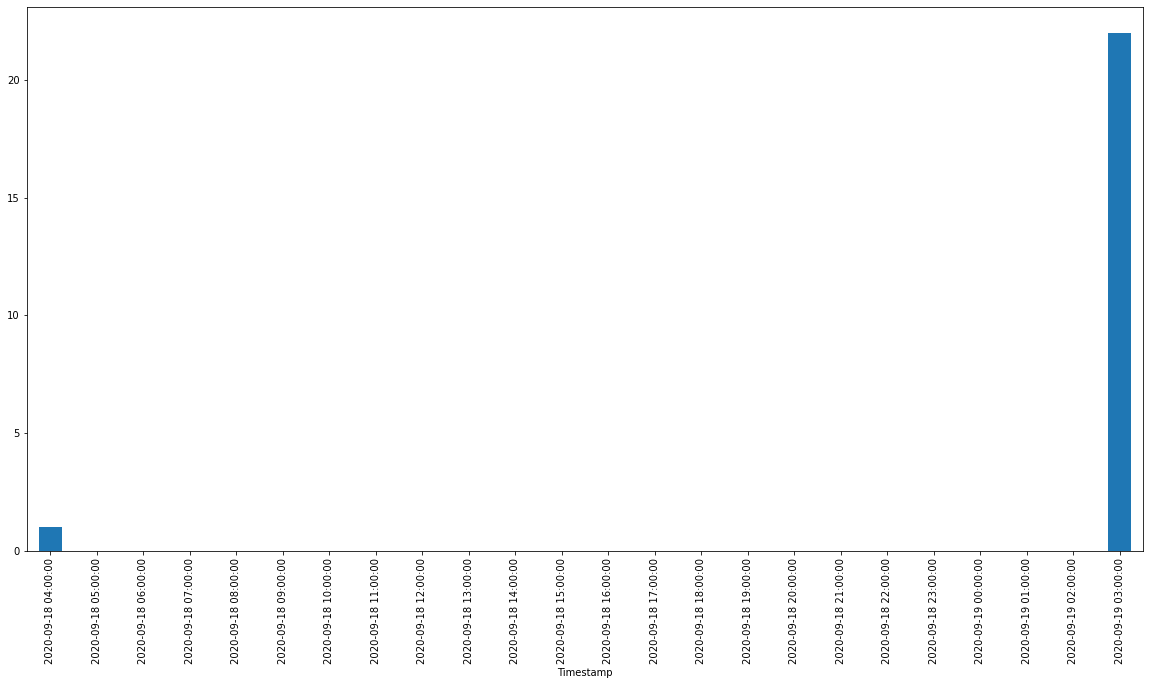

In [62]:
unique_logons_df.plot.bar()

**In this way, we can easily see that there have been a large number of failed logon attempts on the computer without using the DataFrame and searching line by line.**

## 4.2. Failed Logons Analysis

As on other occasions, we can do it even more easily, using the **xanalysis()** function of the CHRYSALIS library. 

<span style="color:purple">
<b>INSTRUCTIONS:</b>

<ul>
    <li>Execute the cell</li>
    <li>Select DataFrame as analysis object</li>
    <li>Select evtx for the type of analysis</li>
    <li>Select 4625 as DF to analyze </li>
    <li>Select Failed Logons info as the available analysis</li>
</ul>
</span>


In [73]:
xanalysis(secevtxdfs_srv)

**Analisys explorer:**

Box(children=(Dropdown(description='Analysis object: ', layout=Layout(width='250px'), options=('Select one...'…

Box(children=(Dropdown(description='Available analysis types: ', layout=Layout(width='550px'), options=(), sty…

Output(layout=Layout(overflow='auto', width='99%'))

<span style="color:blue">**How many failed logons occurred on the Domain Controller/Server?** </span>


<span style="color:green">**ANSWER**:</span>

<span style="color:green">There were 22 failed logons.</span>

<span style="color:blue">**At what time was the Brute Force used?** </span>


<span style="color:green">**ANSWER**:</span>


<span style="color:green">The Brute Force was at aproximately 3:00 AM on the 19th of September 2020</span>

### **4.3. CONCLUSIONS**:

**5. FAILED LOGONS**

 - There's been Brute force on the 19th of September 2020

## **5. LOOKING INTO THE FSTL & AUTORUNS**

<span style="color:blue">**Is there any suspicious activity?** </span>


<span style="color:blue">**Was there an Internet download?** </span>

<span style="color:blue">**When was the Szechuan Sauce modified?**</span>

<span style="color:blue">**Is coreupdater.exe a malware?** </span>

### 5.1 Filesystem Timeline

Once we have verified that there has been an attacker’s logon, the main thing is to understand what damage or activity has been done on the computer. To do this, we will use the Filesystem Timeline, which as previously mentioned in the notebook, provides information about the system’s activity on a timeline.

We will filter by date using **.loc()** from pandas. This will allow us to see the activity from the moment of the attack. Let's see which column we need to use!

In [64]:
fstldf.columns

Index(['D4_DataType_', 'D4_Orchestrator_', 'D4_Tool_', 'D4_Plugin_',
       'D4_Hostname_', 'Date', 'Size', 'MACB', 'Mode', 'UID', 'GID', 'Meta',
       'File Name', 'Type_', 'PrevType_', 'Permissions_', 'Deleted_',
       'Reallocated_', 'Tag_', 'FilePath_', 'Hostname_', 'EVOName_',
       'EvidenceName_', 'Partition_', 'FSType_', 'DriveLetter_', 'VSS_',
       'TSNTFSAttr_', 'SHA256_Hash_'],
      dtype='object')

Let's select the date 2020-09-19 03:21:47 from the Date column.

<span style="color:purple">
    <b>INSTRUCTIONS</b>
    
<ul>
    <li>Execute the cell</li>
    <li>Select '+ DataFrame' as DataFrame on the left drop-down menu</li>
    <li>Select qgrid as grid on the middle drop-down menu</li>
</ul>
</span>

In [74]:
fstldf_DC_filterbydate = fstldf.loc[(fstldf['Date'] >= '2020-09-18 00:21:47')]
xmenu(fstldf_DC_filterbydate)

**DataFrame visualization menu:**

Box(children=(Dropdown(description='Select DataFrame or Column', layout=Layout(width='550px'), options=('Selec…

Output(layout=Layout(overflow='auto', width='99%'))

Output(layout=Layout(overflow='auto', width='99%'))

To understand the FSTL correctly, we will see that there is a column called MACB, this column gives us information about the actions performed on a file. To interpret it, depending on the letters that appear (m, a, c or b) we can help us with the following **SANS** tables:

<img src="./Pictures/MACB.webp">


<span style="color:blue">**Is there any suspicious activity?** </span>


<span style="color:green">**ANSWER**:</span>

<span style="color:green">The atacker had access to several files, shared them and, besides, we can see that there's been a download from Internet Explorer: coreupdater.exe that was moved to /Windows/System32 folder.</span>


<span style="color:blue">**Was there an Internet download?** </span>

<span style="color:green">**ANSWER**:</span>


<span style="color:green">There's been a download from Internet Explorer: coreupdater.exe</span>

<span style="color:blue">**When was the Szechuan Sauce modified?** </span>

<span style="color:green">**ANSWER**:</span>


<span style="color:green">It was modified on 2020-09-18 15:38:56. At the MACB column, you can see that value 'm' and 'c' for Szechuan Sauce.txt</span>

<span style="color:green">The MAC(b) times are derived from file system metadata and they stand for:</span>

   - <span style="color:green">TModified</span>
   - <span style="color:green">TAccessed</span>
   - <span style="color:green">TChanged ($MFT Modified)</span>
   - <span style="color:green">TBirth (file creation time)</span>

<span style="color:green">The (b) is in parentheses because not all file systems record a birth time.</span>

<span style="color:green">Learn more about macb here: https://www.andreafortuna.org/2017/10/06/macb-times-in-windows-forensic-analysis/</span>

### 5.2 Autoruns

We can look for it on autoruns. In this way, we will check if it was moved on the Services and we will be able to see its hash. To locate coreupdater.exe, we will use the **xgrep()** function of the CHRYSALIS library, which allows us to search for a string within any column or row of the DataFrame.

In [67]:
xgrep(atrsdf, 'coreupdater')

,index,D4_DataType_,D4_Orchestrator_,D4_Tool_,D4_Plugin_,D4_Hostname_,Time,Entry Location,Entry,Enabled,Category,Profile,Description,Signer,Signer_Verified_,Company,Image Path,Version,Launch String,MD5,SHA-1,PESHA-1,PESHA-256,SHA-256,IMP
0,22,autoruns,nan,autoruns,nan,nan,2010-04-14 15:06:00,HKLM\System\CurrentControlSet\Services,coreupdater,enabled,Services,System-wide,coreupdater:,,False,,c:\windows\system32\coreupdater.exe,,C:\Windows\System32\coreupdater.exe,EED41B4500E473F97C50C7385EF5E374,FD153C66386CA93EC9993D66A84D6F0D129A3A5C,C3E46C6242056ACE3217A5314CFF2063BE8E9799,88763E60ED00AFDA80A61647782B597542D9667D2B9A35FB2623967E302FA28E,10F3B92002BB98467334161CF85D0B1730851F9256F83C27DB125E9A0C1CFDA6,B4C6FFF030479AA3B12625BE67BF4914


**It's been installed with persistence and we can obtain the hash from the SHA-256 column: 10F3B92002BB98467334161CF85D0B1730851F9256F83C27DB125E9A0C1CFDA6**

### 5.3 VirusTotal

To check what coreupdater.exe is, we can use **VirusTotal**. It analyzes suspicious files and URLs to detect types of malware and automatically shares them with the security community. We can search for coreupdater hash (10F3B92002BB98467334161CF85D0B1730851F9256F83C27DB125E9A0C1CFDA6) here: https://www.virustotal.com/gui/home/search

<img src="./Pictures/virustotal.png">

<span style="color:blue">**Is coreupdater.exe a malware?** </span>

<span style="color:green">**ANSWER**:</span>

<span style="color:green">The information in VirusTotal suggest that is a malware!</span>

## **6. GETTING MORE INFORMATION FROM SHELLBAGS**

What can we do next? We can use the Shellbag to check what folders the atacker visited.

<span style="color:blue">**Which folders did the atacker visit?** </span>


### **6.1 Shellbags**

- Set of registry keys that store details about a viewed folder, such as its size, position, and icon.
- It helps track views, sizes and positions of a folder window when viewed through Windows Explorer; this includes network folders and removable devices.

To select the DataFrame we are interested in, we will use **xmenu()** from CHRYSALIS. 

<span style="color:purple">
    <b>INSTRUCTIONS</b>
    
<ul>
    <li>Execute the cell</li>
    <li>Select 'windows_shell_item_file_entry' as DataFrame on the left drop-down menu</li>
    <li>Select qgrid as grid on the middle drop-down menu</li>
</ul>
</span>


In [75]:
xmenu(pldfs_srv)

**DataFrame visualization menu:**

Box(children=(Dropdown(description='Select DataFrame', layout=Layout(width='550px'), options=('Select DataFram…

Output(layout=Layout(overflow='auto', width='99%'))

Output(layout=Layout(overflow='auto', width='99%'))

We are particularly intrigued by a 'Secret' file in the 'Fileshare' directory and the access to the Downloads folder, probably after coreupdater.exe download.

<span style="color:blue">**Which folders did the atacker visit?** </span>

<span style="color:green">**ANSWER**:</span>

- <span style="color:green">'Secret' file on Fileshare</span>
- <span style="color:green">There's been an access to the Downloads folder </span>

### **6.2. CONCLUSIONS**:

**6. GETTING MORE INFORMATION FROM SHELLBAGS**

The folders the attacker visited are:
- 'Secret' file on Fileshare
- There's been an access to the Downloads folder 

## 7. Analyzing Network Traffic

<span style="color:blue">**What is the port number that the attacker downloaded the malware from?** </span>


### 7.1. TShark

TShark is a network protocol analyzer. 
It allows you to:
- Capture packet data from a live network
- Read packets from a previously saved capture file
- Output and write the packets to a file. (JSON, CSV etc.)

In this demo. we will make use of a generated CSV files using different Wireshark filters on the PCAP provided by the case.


### 7.2. HTTP

The following command was used with Tshark to find out about the HTTP GET Method:

tshark -n -r <pcap location> -Y "http.request.method == "GET"" -T fields -Eheader=y -e ip.src -e ip.dst -e tcp.srcport -e tcp.dstport -e http.request.uri -e frame.time
    
HTTP GET Request Method was used to help us filter on the packets to help us find out how was coreupdater.exe introduced into the victims' systems.
    
<span style="color:purple">
    <b>INSTRUCTIONS</b>
    
<ul>
    <li>Execute cell</li>
    <li>Click SELECT & READ</li>
</ul>
    </span>

In [76]:
xread(tool='tshark', rootpath=home_path[0]+'/Data/PCAP_http.pcap.csv')

Select _tsharkd file:

Accordion(children=(SelectMultiple(options=('init',), rows=10, value=()),), selected_index=None, _titles={'0':…

Button(description='SELECT & READ', style=ButtonStyle())

Output()

In [77]:
pcaphttpdf = d4.out

We shall make use of **xgrep()** from CHRYSALIS to find out how coreupdater.exe was downloaded

In [79]:
xgrep(pcaphttpdf, 'coreupdater')

,index,Source_IP,Destination_IP,Source_TCP_Port,Destination_TCP_Port,Frame_Time,Protocol,Info
0,114,10.42.85.10,194.61.24.102,62410,80,"Sep 19, 2020 04:24:06.939239000 CEST",HTTP,GET /coreupdater.exe HTTP/1.1
1,134,10.42.85.115,194.61.24.102,50864,80,"Sep 19, 2020 04:39:58.410684000 CEST",HTTP,GET /coreupdater.exe HTTP/1.1


**NOTE: Packets are in CEST and Domain Controller was in Pacific Standard Time, hence we have to minus 1 hour from packet time**


The IP address '194.61.24.102' hosted the malware file on port 80 (HTTP) that the victims were made to download onto their respective systems)
But how did the malicious IP know about the network?
Attackers usually performs reconnaissance to understand about the network and try to exploit exploit vulnerabilities.


### 7.3. Reconnaissance Scan

Let's replace the "http.request.method == GET" filter with "ip.addr == 194.61.24.102".
This filter helps us to understand about the malicious IP as both source and destination IP to learn what was done in the network.

<span style="color:purple">
    <b>INSTRUCTIONS</b>
    
<ul>
    <li>Execute cell</li>
    <li>Click SELECT & READ</li>
</ul>
    </span>

In [80]:
xread(tool='tshark', rootpath=home_path[0]+'/Data/PCAP_nmap.pcap.csv')

Select _tsharkd file:

Accordion(children=(SelectMultiple(options=('init',), rows=10, value=()),), selected_index=None, _titles={'0':…

Button(description='SELECT & READ', style=ButtonStyle())

Output()

In [81]:
pcapnmapdf = d4.out

As there are many packets by the malicious IP, we can make use of the first few packets to learn about the behaviour using pandas' head()

In [82]:
pcapnmapdf.head(20)

,Source_IP,Destination_IP,Source_TCP_Port,Destination_TCP_Port,Frame_Time,Protocol,Info
0,194.61.24.102,10.42.85.10,NaN,NaN,"Sep 19, 2020 04:19:13.414319000 CEST",ICMP,"Echo (ping) request id=0xef6f, seq=0/0, ttl=56"
1,194.61.24.102,10.42.85.10,64385.0,443.0,"Sep 19, 2020 04:19:13.414353000 CEST",TCP,64385 → 443 [SYN] Seq=0 Win=1024 Len=0 MSS=1460
2,194.61.24.102,10.42.85.10,64385.0,80.0,"Sep 19, 2020 04:19:13.414370000 CEST",TCP,64385 → 80 [ACK] Seq=1 Ack=1 Win=1024 Len=0
3,194.61.24.102,10.42.85.10,NaN,NaN,"Sep 19, 2020 04:19:13.414386000 CEST",ICMP,"Timestamp request id=0xe076, seq=0/0, ttl=51"
4,10.42.85.10,194.61.24.102,NaN,NaN,"Sep 19, 2020 04:19:13.414869000 CEST",ICMP,"Echo (ping) reply id=0xef6f, seq=0/0, ttl=128 (request in 84319)"
5,194.61.24.102,10.42.85.10,38088.0,3389.0,"Sep 19, 2020 04:19:26.469203000 CEST",TCP,38088 → 3389 [SYN] Seq=0 Win=64240 Len=0 MSS=1460 SACK_PERM=1 TSval=2976250824 TSecr=0 WS=128
6,10.42.85.10,194.61.24.102,3389.0,38088.0,"Sep 19, 2020 04:19:26.469491000 CEST",TCP,"3389 → 38088 [SYN, ACK] Seq=0 Ack=1 Win=64000 Len=0 MSS=1460 WS=1 SACK_PERM=1 TSval=701188 TSecr=2976250824"
7,194.61.24.102,10.42.85.10,38088.0,3389.0,"Sep 19, 2020 04:19:26.469759000 CEST",TCP,38088 → 3389 [ACK] Seq=1 Ack=1 Win=64256 Len=0 TSval=2976250824 TSecr=701188
8,194.61.24.102,10.42.85.10,38088.0,3389.0,"Sep 19, 2020 04:19:26.469897000 CEST",TCP,"38088 → 3389 [RST, ACK] Seq=1 Ack=1 Win=64256 Len=0 TSval=2976250824 TSecr=701188"
9,194.61.24.102,10.42.85.10,38090.0,3389.0,"Sep 19, 2020 04:19:26.472244000 CEST",TCP,38090 → 3389 [SYN] Seq=0 Win=64240 Len=0 MSS=1460 SACK_PERM=1 TSval=2976250827 TSecr=0 WS=128


The very first packet, the malicious IP did a ping request Domain Controller (10.42.85.10). Ping/ICMP scan is one of the common methods to find out what devices are connected to the network.

Next few packets, within the very same second (04:19:13), there were two probes to port 443 (HTTPS) and 80 (HTTP) before getting ICMP reply from the Domain Controller.

This means that there was a service port scan done on domain controller itself.

### 7.4. Remote Desktop Protocol

About 13 seconds later at 04:19:26, the malicious IP trying to connect to port 3389 (RDP) with incremental source TCP port number of 2 (38088, 38090, 38092, etc.)

This behaviour could meant that the malicious IP is trying to conduct a brute force attack to login with RDP.

Let's replace the filter with "ip.addr == 194.61.24.102 and tcp.dstport == 3389 and tcp.flags.syn==1"

As we know the malicious IP and the destination is port 3389, TCP SYN has to be 1 as it is always the start of TCP handshake.

To learn about TCP handshake, visit: https://www.guru99.com/tcp-3-way-handshake.html

<span style="color:purple">
    <b>INSTRUCTIONS</b>
    
<ul>
    <li>Execute cell</li>
    <li>Click SELECT & READ</li>
</ul>
    </span>

In [83]:
xread(tool='tshark', rootpath=home_path[0]+'/Data/PCAP_rdp.pcap.csv')

Select _tsharkd file:

Accordion(children=(SelectMultiple(options=('init',), rows=10, value=()),), selected_index=None, _titles={'0':…

Button(description='SELECT & READ', style=ButtonStyle())

Output()

In [84]:
pcaprdpdf = d4.out

<span style="color:purple">
    <b>INSTRUCTIONS</b>
    
<ul>
    <li>Execute the cell</li>
    <li>Select '+ DataFrame' as DataFrame on the left drop-down menu</li>
    <li>Select qgrid as grid on the middle drop-down menu</li>
</ul>
</span>


In [86]:
xmenu(pcaprdpdf)

**DataFrame visualization menu:**

Box(children=(Dropdown(description='Select DataFrame or Column', layout=Layout(width='550px'), options=('Selec…

Output(layout=Layout(overflow='auto', width='99%'))

Output(layout=Layout(overflow='auto', width='99%'))

From **xmenu()** with the dataframe, we can see that there were twenty thousands packets in just 2 minutes!
However, at 04:22:36 to 04:56:03, there were no other SYN packets.
This meant that the attacker successfully logon to Domain Controller where it downloaded the malware at 04:24:04

<span style="color:blue">**What is the port number that the attacker downloaded the malware from?** </span>


<span style="color:green">**ANSWER**:</span>

<span style="color:green">The victims downloaded from port 80 (HTTP) from 194.61.24.102 that the attack hosted using HTTP server.</span>

<span style="color:green">HTTP GET Method is a common method that attackers use to disguise as legitimate traffic</span>

<span style="color:green">Other possible ways are:</span>
- <span style="color:green">Phishing emails</span>
- <span style="color:green">Vulnerabilities</span>
- <span style="color:green">Bundleware</span>
- <span style="color:green">Exploit kits</span>

### **7.5. CONCLUSIONS**:

**7. Looking Into the PCAP File**

- The victims downloaded the malware from 194.61.24.102 using HTTP GET Method
- The attack hosted malware on a HTTP server